# Notebook for *From Fed Funds to Mortgages*
### by Eric Leonen

In this notebook, we analyze and visualize the relationships between the links in the monetary policy transmission mechanism. Namely, the links between:
- The Federal Funds rate and the short-term rate (3-Month Treasury)
- The short-term rate and the long-term rate (10-Year Treasury)
- The long-term rate and the FRM rate (30-Year Mortgage)

**Note:** This analysis had been done on August 11, 2025, meaning all series data up to 2025 Q2 were available.

In [1]:
from src.data import get_data, difference_data, Frequency
import src.plotting as plotting
from src.modelling import fit_lm

plotting.set_theme()

alpha = 0.05

**Step 1: Getting the data**

We get and plot the four (Federal Funds, short-term, long-term, and FRM) yearly interest rates from 1981-2025.

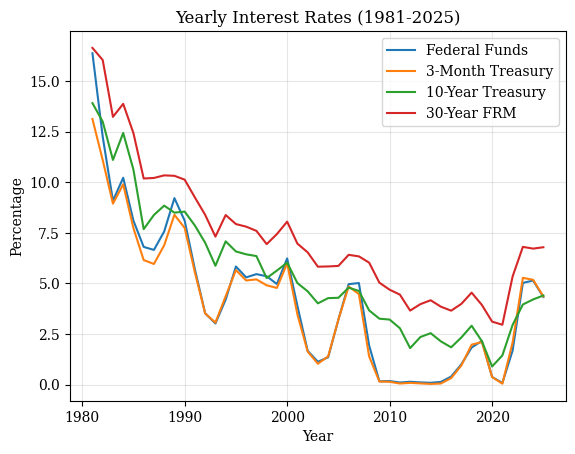

In [2]:
data = get_data(freq=Frequency.Yearly)
_ = data.plot(
        title=f"Yearly Interest Rates ({data.index.min()}-{data.index.max()})",
        xlabel="Year",
        ylabel="Percentage"
    )

**Step 2: Differencing the data**

We get year-over-year changes in rates. We want to remove trends in all the series. We visualize them.

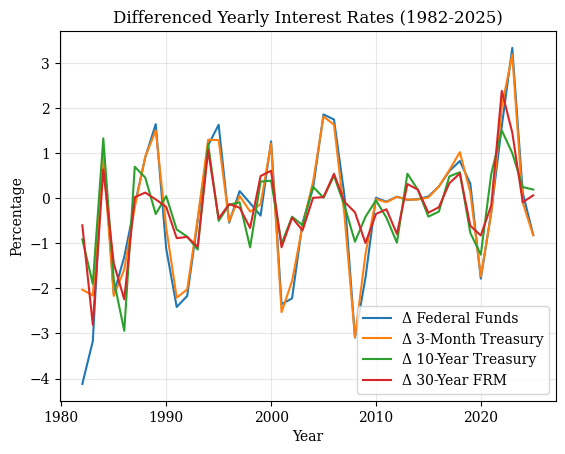

In [3]:
diff_data = difference_data(data)
_ = diff_data.plot(
        title=f"Differenced Yearly Interest Rates ({diff_data.index.min()}-{diff_data.index.max()})",
        xlabel="Year",
        ylabel="Percentage"
    )

**Step 3: Analyzing the relationship between changes in Federal Funds and changes in the short-term rate**

We perform an OLS regression to get the link between changes in these rates. We observe a significant positive relationship ($p\approx 0.000$) and a very strong linear relationship ($R^2=0.939$).

                            OLS Regression Results                            
Dep. Variable:     Δ 3-Month Treasury   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     651.7
Date:                Mon, 11 Aug 2025   Prob (F-statistic):           3.35e-27
Time:                        11:21:31   Log-Likelihood:                -13.932
No. Observations:                  44   AIC:                             31.86
Df Residuals:                      42   BIC:                             35.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0362      0.052     

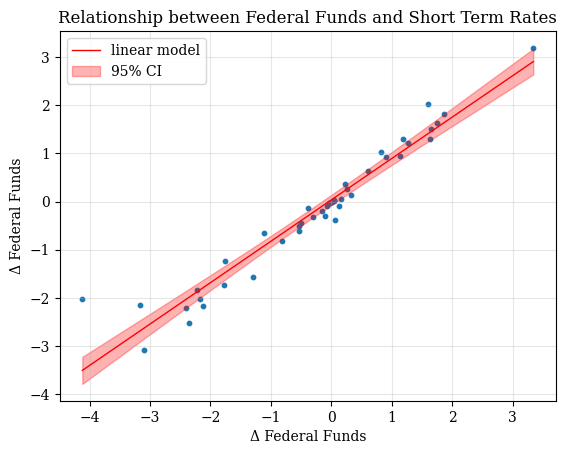

In [4]:
pred_3mo_from_ff, lm_3mo_from_ff = fit_lm(
    x=diff_data["Δ Federal Funds"],
    y=diff_data["Δ 3-Month Treasury"]
)

print(lm_3mo_from_ff.summary())

plotting.plot_lm(
    x=diff_data["Δ Federal Funds"],
    y=diff_data["Δ 3-Month Treasury"],
    predict_with_ci=pred_3mo_from_ff,
    alpha=alpha,
    title="Relationship between Federal Funds and Short Term Rates"
)

**Step 4: Analyzing the relationship between changes in the short-term rate and changes in the long-term rate**

We perform an OLS regression to get the link between changes in these rates. We observe a significant positive relationship ($p\approx 0.000$) but a somewhat weak linear relationship ($R^2=0.480$).

                            OLS Regression Results                            
Dep. Variable:     Δ 10-Year Treasury   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     38.75
Date:                Mon, 11 Aug 2025   Prob (F-statistic):           1.89e-07
Time:                        11:21:31   Log-Likelihood:                -42.224
No. Observations:                  44   AIC:                             88.45
Df Residuals:                      42   BIC:                             92.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1265      0

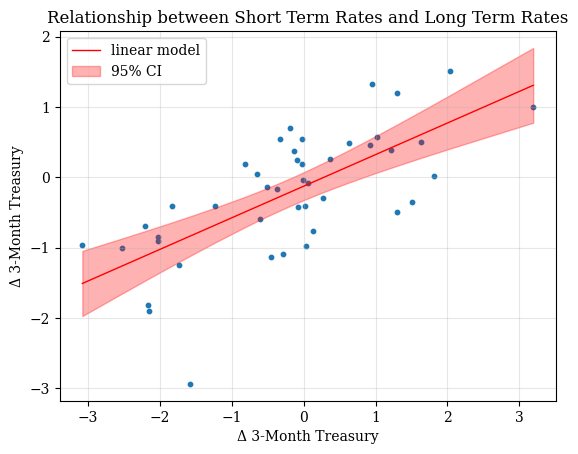

In [5]:
pred_10y_from_3mo, lm_10y_from_3mo = fit_lm(
    x=diff_data["Δ 3-Month Treasury"],
    y=diff_data["Δ 10-Year Treasury"]
)

print(lm_10y_from_3mo.summary())

plotting.plot_lm(
    x=diff_data["Δ 3-Month Treasury"],
    y=diff_data["Δ 10-Year Treasury"],
    predict_with_ci=pred_10y_from_3mo,
    alpha=alpha,
    title="Relationship between Short Term Rates and Long Term Rates"
)

**Step 5: Analyzing the relationship between changes in the long-term rate and changes in the FRMs**

We perform an OLS regression to get the link between changes in these rates. We observe a significant positive relationship ($p\approx 0.000$) and a strong linear relationship ($R^2=0.827$).

                            OLS Regression Results                            
Dep. Variable:          Δ 30-Year FRM   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     201.0
Date:                Mon, 11 Aug 2025   Prob (F-statistic):           1.32e-17
Time:                        11:21:31   Log-Likelihood:                -17.101
No. Observations:                  44   AIC:                             38.20
Df Residuals:                      42   BIC:                             41.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0314      0

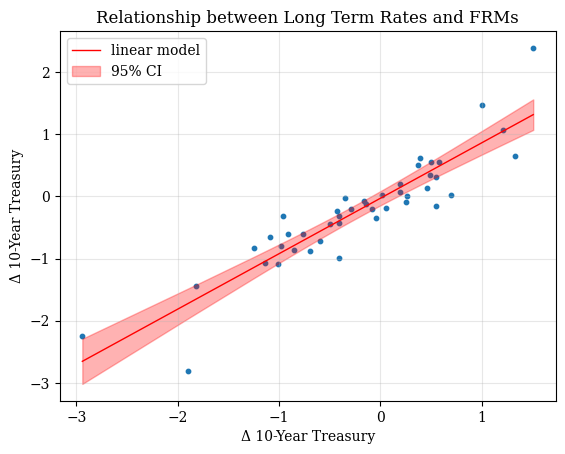

In [6]:
pred_30y_from_10y, lm_30y_from_10y = fit_lm(
    x=diff_data["Δ 10-Year Treasury"],
    y=diff_data["Δ 30-Year FRM"]
)

print(lm_30y_from_10y.summary())

plotting.plot_lm(
    x=diff_data["Δ 10-Year Treasury"],
    y=diff_data["Δ 30-Year FRM"],
    predict_with_ci=pred_30y_from_10y,
    alpha=alpha,
    title="Relationship between Long Term Rates and FRMs"
)